# Another example from the web of using FB Prophet package
Source [url](http://pythondata.com/forecasting-time-series-data-with-prophet-part-2/)
Data corresponds to retail_sales example csv

## this is part 2 focused on tweaking the model

In [1]:
retail_datafile = '../datasets/example_retail_sales.csv'

In [2]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [3]:
sales_df = pd.read_csv(retail_datafile)
sales_df['y_orig'] = sales_df['y'] # to save a copy of the original data..you'll see why shortly. 
# log-transform y
sales_df['y'] = np.log(sales_df['y'])
sales_df.tail()

,ds,y,y_orig
288,2016-01-01,12.901537,400928
289,2016-02-01,12.932543,413554
290,2016-03-01,13.039184,460093
291,2016-04-01,13.019078,450935
292,2016-05-01,13.063507,471421


### Start modeling

In [4]:
model = Prophet()
model.fit(sales_df[['ds','y']])
#create 12 months of future data
future_data = model.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = model.predict(future_data)

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [5]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
300,2016-12-31,12.945071,12.922593,12.968187
301,2017-01-31,12.968193,12.943553,12.994479
302,2017-02-28,13.064662,13.038743,13.090464
303,2017-03-31,13.054117,13.028228,13.083777
304,2017-04-30,13.106254,13.077519,13.137530


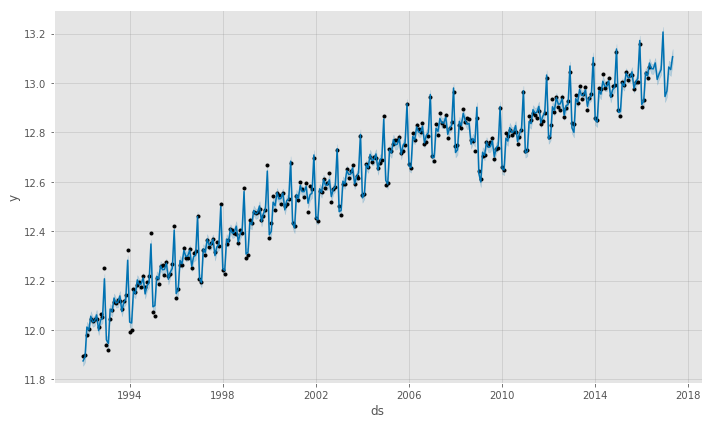

In [6]:
model.plot(forecast_data);

While this is a nice chart, it is kind of ‘busy’ for me.  Additionally, I like to view my forecasts with original data first and forecasts appended to the end (this ‘might’ make sense in a minute).

First, we need to get our data combined and indexed appropriately to start plotting. We are only interested (at least for the purposes of this article) in the ‘yhat’, ‘yhat_lower’ and ‘yhat_upper’ columns from the Prophet forecasted dataset.  Note: There are much more pythonic ways to these steps, but I’m breaking them out for each of understanding.

In [ ]:
#model.plot_components(forecast_data);

In [7]:
sales_df.set_index('ds', inplace=True)
forecast_data.set_index('ds', inplace=True)
viz_df = sales_df.join(forecast_data[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
del viz_df['y']
viz_df.tail()

,y_orig,yhat,yhat_lower,yhat_upper
ds,,,,
2016-12-31,NaN,12.945071,12.922593,12.968187
2017-01-31,NaN,12.968193,12.943553,12.994479
2017-02-28,NaN,13.064662,13.038743,13.090464
2017-03-31,NaN,13.054117,13.028228,13.083777
2017-04-30,NaN,13.106254,13.077519,13.137530


The `y_orig` column is null because we don't know the future values. 

Break down of how to vizualize this data in a little more detail than Prophet does by default.

Begin by getting the last date in the original dataset.

In [8]:

sales_df.index = pd.to_datetime(sales_df.index)
last_date = sales_df.index[-1]


In [11]:
from datetime import date,timedelta
def plot_data(func_df, end_date):
    end_date = end_date - timedelta(weeks=4) # find the 2nd to last row in the data. We don't take the last row because we want the charted lines to connect
    mask = (func_df.index > end_date) # set up a mask to pull out the predicted rows of data.
    predict_df = func_df.loc[mask] # using the mask, we create a new dataframe with just the predicted data.
    # Now...plot everything
    fig, ax1 = plt.subplots()
    ax1.plot(func_df.y_orig)
    ax1.plot((np.exp(predict_df.yhat)), color='black', linestyle=':')
    ax1.fill_between(predict_df.index, np.exp(predict_df['yhat_upper']), np.exp(predict_df['yhat_lower']), alpha=0.5, color='darkgray')
    ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
    ax1.set_ylabel('Dollar Sales')
    ax1.set_xlabel('Date')
    # change the legend text
    L=ax1.legend() #get the legend
    L.get_texts()[0].set_text('Actual Sales') #change the legend text for 1st plot
    L.get_texts()[1].set_text('Forecasted Sales') #change the legend text for 2nd plot

In [13]:
viz_df

,y_orig,yhat,yhat_lower,yhat_upper
ds,,,,
1992-01-01,146376.0,11.874747,11.854859,11.894563
1992-02-01,147079.0,11.891276,11.869607,11.909054
1992-03-01,159336.0,12.011923,11.993578,12.033317
1992-04-01,163669.0,12.000119,11.981204,12.018980
1992-05-01,170068.0,12.055784,12.036544,12.075837
1992-06-01,168663.0,12.032517,12.012758,12.053107
1992-07-01,169890.0,12.037031,12.017323,12.058126
1992-08-01,170364.0,12.061187,12.041897,12.081546
1992-09-01,164617.0,11.997632,11.979330,12.017966


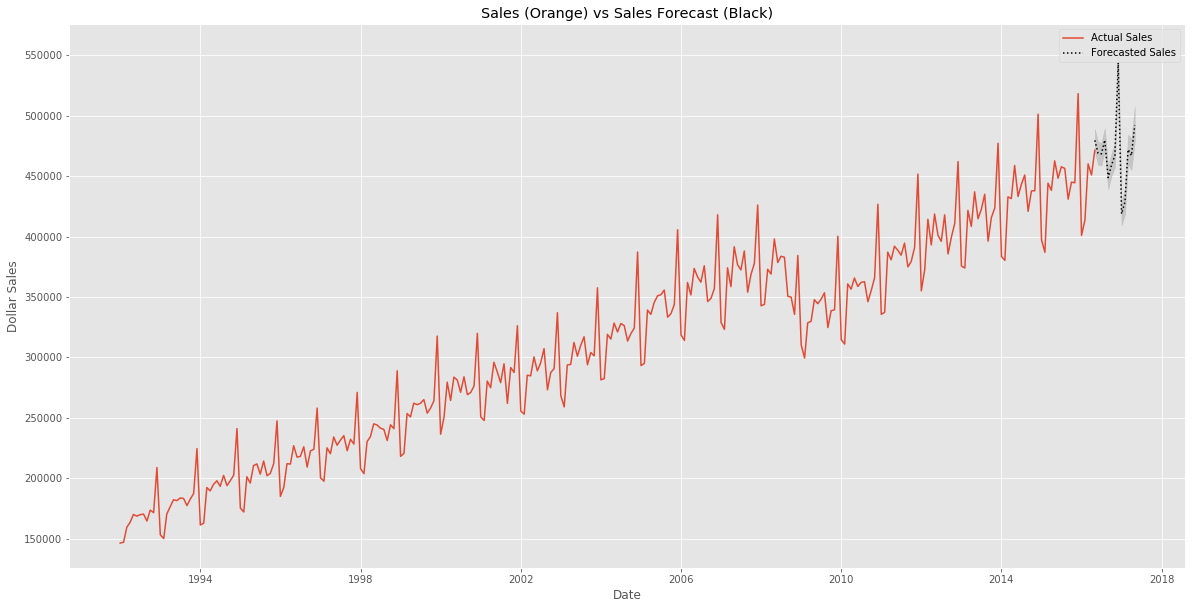

In [14]:
plot_data(viz_df, last_date)

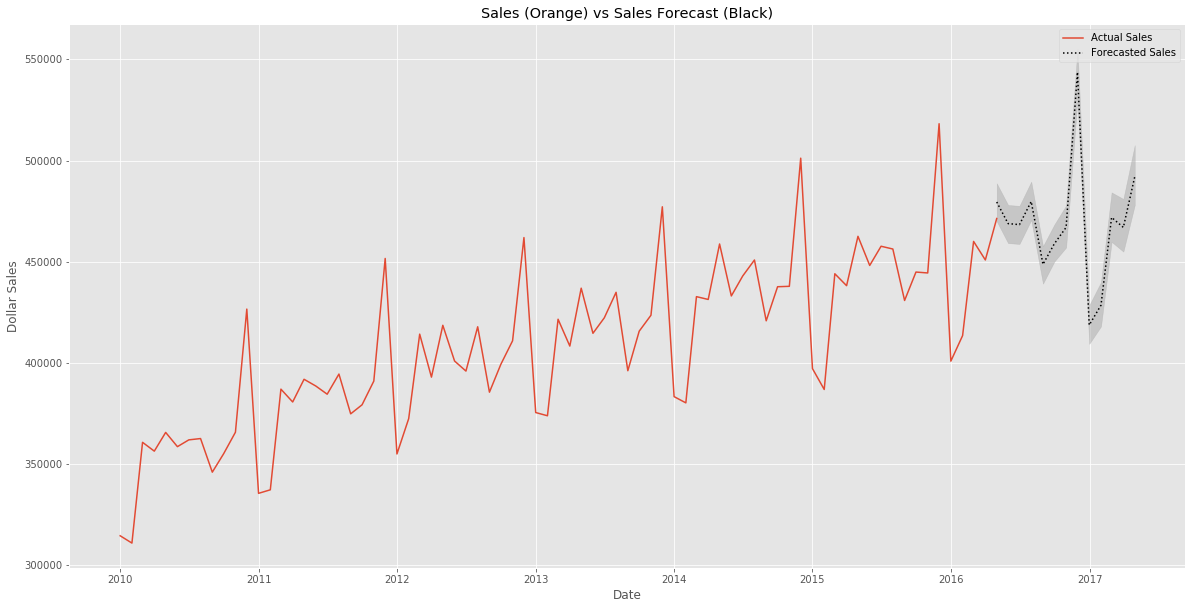

In [16]:
plot_data(viz_df.loc['2010-01-01':], last_date)